In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#Description du dataset --> https://archive.ics.uci.edu/ml/datasets/automobile
df = pd.read_csv('../dataset_voitures_sans_entete.csv')
df.describe()

,3,88.60,168.80,64.10,48.80,2548,130,9.00,21,27
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.823529,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,10.148137,25.240196,30.769608
std,1.239035,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,3.981000,6.551513,6.898337
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,8.575000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,9.400000,30.000000,34.500000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [3]:
#Les entête 
headers = ['symboling','normalized-losses','make','fueltype','aspiration','num-of-doors','body-style','drive-wheels',
           'engine-location','wheelbase','length','width','height','curb-weight','engine-type','num-of-cylinders',
           'engine-size','fuelsystem','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg',
           'highway-mpg','price']
db = pd.read_csv('../dataset_voitures_sans_entete.csv', header=None, names=headers)
db.to_csv('dataset_voitures_avec_entete.csv')
db.head(5)

,symboling,normalized-losses,make,fueltype,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheelbase,...,engine-size,fuelsystem,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<font size="10"><b><u>Prise de Connaissance du Dataset</u></b></font>

In [4]:
db.describe()
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fueltype           205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheelbase          205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
t = db['normalized-losses']
count = 0
for i in headers:
    for j in db[i]:
        if (j == '?') or (j == ''):
            count = count + 1
print("il ya ",count,' valeurs de type "?" ou "" dans le dataset')

il ya  59  valeurs de type "?" ou "" dans le dataset


<font size="10"><b><u>Nettoyage</u> (Preprocessing)</b></font>

In [6]:
db.replace('?', np.nan, inplace=True)
db.info()
db.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fueltype           205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheelbase          205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

symboling             0
normalized-losses    41
make                  0
fueltype              0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheelbase             0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuelsystem            0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

<AxesSubplot:>

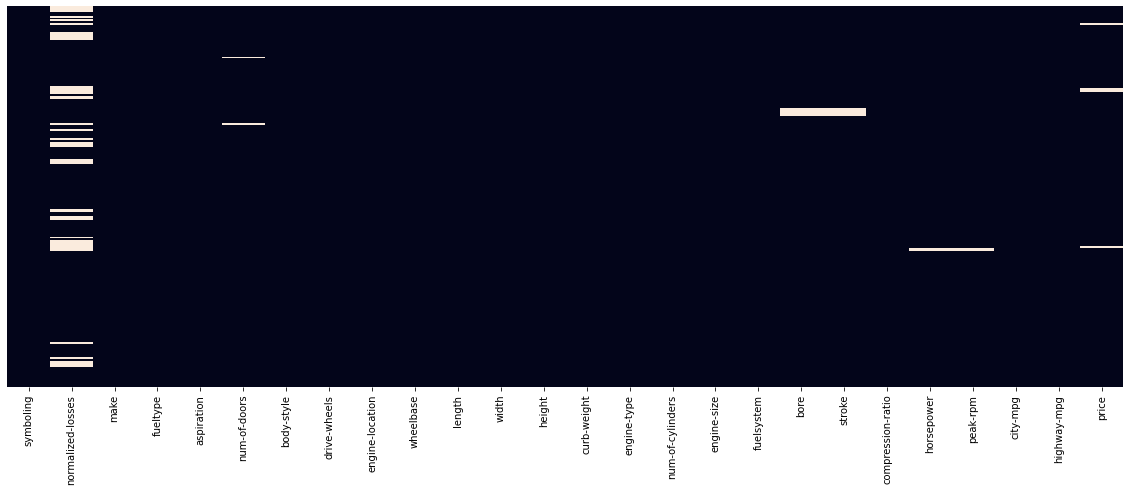

In [7]:
#Representation des valeurs manquantes 
plt.figure(figsize=(20,7))
sns.heatmap(db.isnull(),yticklabels=False, cbar=False)

In [8]:
print(db.shape)
db.dropna(inplace=True)
print(db.shape)
db.isna().sum()

(205, 26)
(159, 26)


symboling            0
normalized-losses    0
make                 0
fueltype             0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheelbase            0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuelsystem           0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [9]:
#Changement du type de variable de 'price' 
db['price'] = db['price'].astype('float')
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    object 
 2   make               159 non-null    object 
 3   fueltype           159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num-of-doors       159 non-null    object 
 6   body-style         159 non-null    object 
 7   drive-wheels       159 non-null    object 
 8   engine-location    159 non-null    object 
 9   wheelbase          159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb-weight        159 non-null    int64  
 14  engine-type        159 non-null    object 
 15  num-of-cylinders   159 non-null    object 
 16  engine-size        159 non

<font size="10"><b><u>Costruction du modèle</u> (à une variable)</b></font></br>
nous ferons un modèle de prediction en fonction de la variable "curb-weight"</br>
<u>NB</u> : n'est pas la seule caractèristique pour predire le prix (c'est juste un essaie)

<AxesSubplot:>

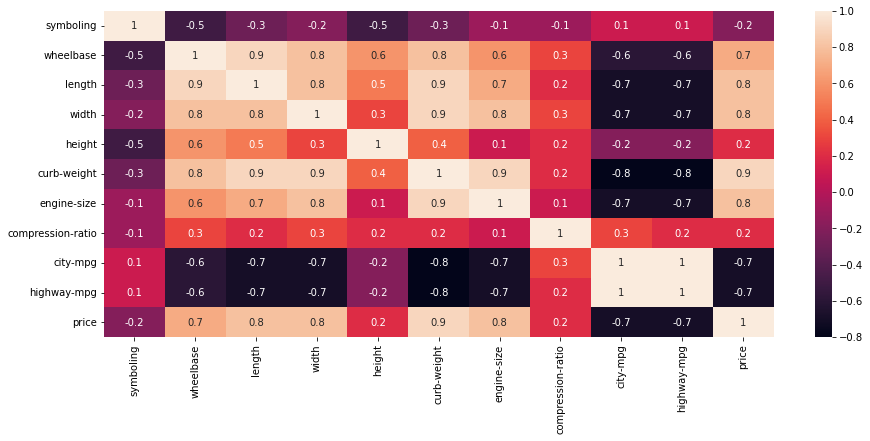

In [10]:
plt.figure(figsize=(15,6))
sns.heatmap(data=db.corr().round(1), annot=True)

In [11]:
import plotly.express as px

#plt.figure(figsize=(15,6))
#plt.subplot(1,2,1)
#sns.scatterplot(x="curb-weight",y="price",data=db)
#plt.subplot(1,2,2)

px.scatter(db,x="curb-weight",y="price")

In [12]:
#construction du modèle
x = pd.DataFrame(np.c_[db['curb-weight']],columns=['curb-weight'])
#db[["curb-weight"]]
y = pd.DataFrame(db['price'])

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

# les paramètres du model 
print("pente (a) : ", model.coef_[0])
print("Ordonné à l'origine (b) : ",model.intercept_)
#Coefficient de determination du modèle
model.score(x,y).round(2)

pente (a) :  [10.89900704]
Ordonné à l'origine (b) :  [-15378.23479292]


0.8

In [13]:
#visualisation du model
titre = "Regression lineaire du prix d'ine voiture en foction de son curb-weight(poids à vide)"
px.scatter(db,x="curb-weight",y="price", trendline='ols', title=titre)
    #ols ----> Ordianry List Square, Methode des moindres carrées 

<font size="10"><b><u>Exemple de Predictions sur de nouvelle données</u></b></font>

In [14]:
n = [3500, 6800, 4066]
nx = pd.DataFrame(np.c_[n], columns=['curb-weight'])
nx
model.predict(nx)[0][0]

22768.289830752154

<font size="10"><b><u>Deploiement du modèle</u></b></font></br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1- Sauvegarde du modèle</br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2- Chargement du modèle </br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3- Verification des paramètres du modèle chargé</br>

In [15]:
#On va sauvegarder le modèle
import joblib
joblib.dump(value = model, filename='price.pkl')


#chargement du modèle
model_charger = joblib.load(filename='price.pkl')


#Verification des paramètres du model 
print("pente (a) : ", model_charger.coef_[0])
print("Ordonné à l'origine (b) : ",model_charger.intercept_)
#Coefficient de determination du modèle
model.score(x,y).round(2)


pente (a) :  [10.89900704]
Ordonné à l'origine (b) :  [-15378.23479292]


0.8

<font size="10"><b><u>Programme</u></b></font>

In [ ]:
user = input("etes vous un acheteur ou un vendeur ? : \n >>>")
if user == "acheteur" : 
    poids = float(input('entrer le poids à vide de la voitutre qui vous interesse : \n >>>'))
    prix_annonce = float(input("entrer le prix afficher sur l'anoncce de la voiture qui vous interesse : \n >>>"))
    prix_predit = model_charger.predict(pd.DataFrame([poids], columns=['curb-weight']))
    if prix_annonce > prix_predit :
        print(">>> le prix affiché sur l'annonce est élevé \n>>> le prix predit par notre modèle est : ",prix_predit[0][0].round(2), "$") 
    else: 
        print("le prix affiché sur l'annonce est abordable, c'est une bonne affaire !😉") 
        
if user == "vendeur" : 
    poids = float(input('entrer le poids à vide de la voitutre à vendre : \n >>>'))
    prix_annonce = float(input("entrer le prix auquel vous voulez vendre votre voiture : \n >>>"))
    prix_predit = model_charger.predict(pd.DataFrame([poids], columns=['curb-weight']))
    if prix_annonce > prix_predit :
        print(">>> le prix auqeul voulez vendre votre voiture est élévé \n>>> le prix predit par notre modèle est : ",prix_predit[0][0].round(2), "$") 
    else: 
        print("le prix auqeul voulez vendre votre voiture est faible par rapport au prix predit par notre modèle : ",prix_predit[0][0].round(2), "$")